In [3]:
# default.peas

# Название атрибута   Тип атрибута   Смысловое значение

# st_id               int            ID ученика
# timest              timestamp      Время решения карточки
# correct             bool           Правильно ли решено задание?
# subject             text           Дисциплина, в которой находится задание

In [4]:
# default.studs

# Название атрибута    Тип атрибута     Смысловое значение

# st_id                int              ID ученика
# test_grp             text             Метка ученика в данном эксперименте

In [5]:
# default.final_project_check

# Название атрибута    Тип атрибута     Смысловое значение

# st_id                int              ID ученика
# sale_time            timestamp        Время покупки
# money                int              Цена, по которой приобрели данный курс
# subject              text   

In [ ]:
print(""""SELECT
    t_1.test_grp AS group,
    SUM(t_2.money)/COUNT(t_1.st_id) AS ARPU,
    SUM(t_2.money)/COUNT(CASE WHEN t_3.buy > 0 THEN 1 end) AS ARPPU,
    COUNT(CASE WHEN t_3.buy > 0 THEN 1 END)/COUNT(t_1.st_id) * 100 AS CR,
    COUNT(CASE WHEN t_1.active > 10 THEN 1 end)/COUNT(t_1.st_id) * 100 AS CR_active,
    COUNT(CASE WHEN t_4.math_buy > 0 THEN 1 END)/COUNT(CASE WHEN t_1.math_active >= 2 THEN 1 END) * 100 AS CR_math_buy
FROM
(SELECT
    t_1.st_id,
    t_1.test_grp,
    t_1.active,
    t_1.math_active,
    t_2.money,
    t_3.buy,
    t_4.math_buy
FROM
    (SELECT
        s.st_id,
        s.test_grp,
        SUM(p.correct) AS active,
        SUM(CASE
            WHEN p.correct = 1 AND p.subject = 'Math' THEN 1
            ELSE 0
        END) AS math_active
    FROM
        studs AS s
    LEFT JOIN peas AS p
    ON s.st_id = p.st_id
    GROUP BY
        s.test_grp,
        s.st_id) AS t_1
    LEFT JOIN
    (SELECT
        st_id,
        SUM(money) AS money
    FROM
        final_project_check
    GROUP BY
        st_id) AS t_2
    ON t_1.st_id = t_2.st_id
    LEFT JOIN
    (SELECT
        st_id,
        COUNT(money) AS buy
    FROM
        final_project_check
    GROUP BY
        st_id) AS t_3
    ON t_1.st_id = t_3.st_id
    LEFT JOIN
    (SELECT
        st_id,
        SUM(CASE
            WHEN money != 0 AND subject = 'Math' THEN 1
            ELSE 0
        END) AS math_buy
    FROM
        final_project_check
    GROUP BY
        st_id) AS t_4
    ON t_1.st_id = t_4.st_id)
GROUP BY
    t_1.test_grp""")


**Логика запроса:** 
- Сначала создаем общую таблицу с нашими уникальными пользователями с присвоением группы
- Для подсчета метрик, присваиваем каждому пользователю нужные параметры согласно условиям из задачи (активный, активный по математике, купил курсы, факт покупки, купил курс по математике)
- Согласно формулам рассчитывем все метрики

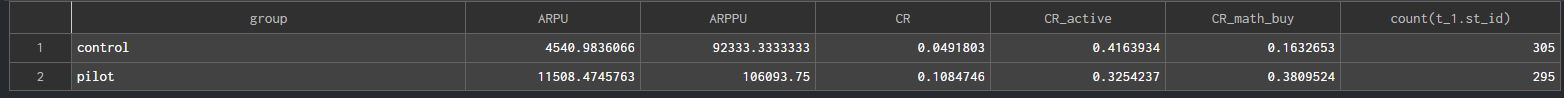